In [12]:
!pip install -U imbalanced-learn

     -------------------------------------- 225.4/225.4 KB 2.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 KB 4.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


You should consider upgrading via the 'C:\Users\00824732\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip3 install tensorflow

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     -------------------------------------- 266.3/266.3 MB 5.2 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 6.0/6.0 MB 10.3 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 KB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
 

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\00824732\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths

You should consider upgrading via the 'C:\Users\00824732\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.preprocessing import StandardScaler
from imblearn_sampling import RandomOverSampler

ModuleNotFoundError: No module named 'tensorflow.python'

In [5]:
df=pd.read_csv('file:///C:/Users/00824732/Desktop/diabetes.csv')

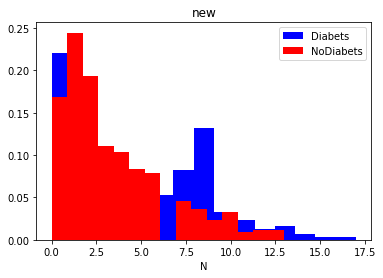

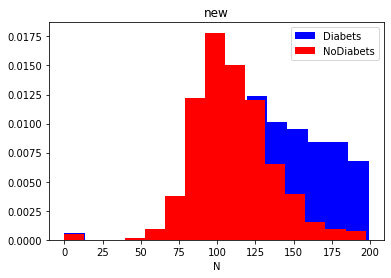

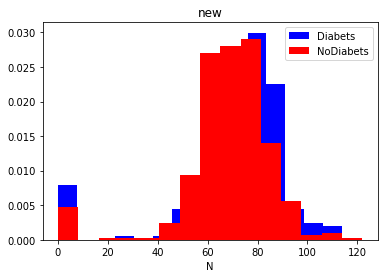

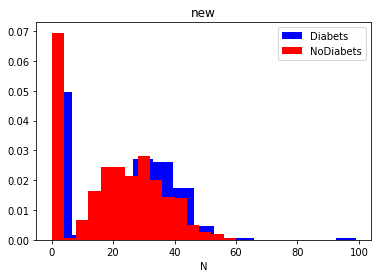

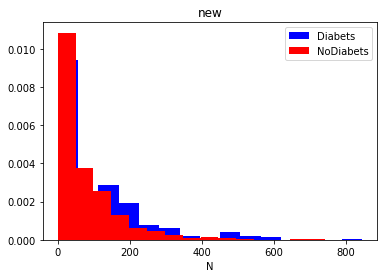

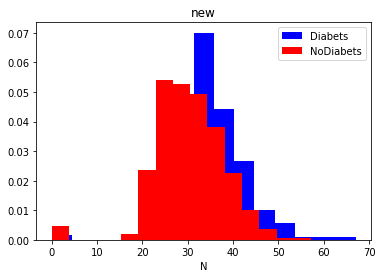

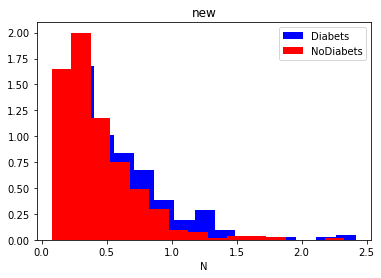

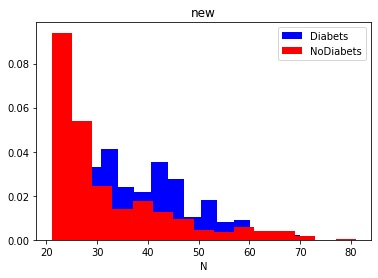

In [6]:
for i in range(len(df.columns[:-1])):
    label=df.columns[i]
    plt.hist(df[df['Outcome']==1][label],color="blue",label="Diabets",density=True,bins=15)
    plt.hist(df[df['Outcome']==0][label],color="red",label="NoDiabets",density=True,bins=15)
    plt.title('new')
    plt.xlabel("N")
    plt.legend()
    plt.show()

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
data=np.hstack(x,np.reshape(y,(-1,1)))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [ ]:
over=RandomOverSampler()
x,y=over.fit_resample(x,y)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30)

In [ ]:
model=tf.keras.sequential([tf.keras.layers.Dense(16,activation="relu"),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizer.Adam(learning_rate=0.001),
loss=tf.keras.loss.BinaryCrossEntropy(),metrics=['accuracy  '])

In [ ]:
model.evaluate(x_valid,y_valid)

In [ ]:
model.fit(x_train,y_train,batch_size=16,epochs=20,validation_data=(x_valid,y_valid))

In [ ]:
model.evaluate(x_test,y_test)

##  Text Classification

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

ModuleNotFoundError: No module named 'tensorflow.python'

In [2]:
df=pd.read_csv("file:///C:/Users/00824732/Desktop/winequalityN.csv")

In [ ]:
df['quality_label']=(df.points>=90).astype(int)

In [ ]:
df=df[["description","points","label"]]

In [ ]:
df.tail()

In [ ]:
train,val,test=np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])

In [ ]:
len(train),len(val),len(test)

In [ ]:
def df_to_dataset()

In [ ]:
train_data=df_to_dataset(train)
valid_data=df_to_dataset(val)
test_data=df_to_dataset(test)

In [ ]:
list(train_data[0])

In [ ]:
## Embedding Model

In [ ]:
embedding="https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer=hub.KerasLayer(embedding,dtype=tf.string,trainable=True)

In [ ]:
hub_layer(list(train_data)[0][0])

In [ ]:
model=tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer=tf.keras.optimizer.Adam(learning_rate=0.001),
loss=tf.keras.losses.BinaryCrossentropy(),
metrics=['accuracy'])

In [ ]:
model.evaluate(valid_data)

In [ ]:
history=model.fit(train_data,epochs=10,validation_data=valid_data)

In [ ]:
model.evaluate(test_data)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_acc'],label='Validation_acc')
plt.title("Accuracy of a model")
plt.ylable("Accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],label='Validation_acc')
plt.title("Loss of a model")
plt.ylable("Loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

LSTM

In [ ]:
encoders=tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text,label:text))

In [ ]:
vocab=np.array(encoder.get_vocabulary())
vocab[:20]

In [ ]:
model=tf.keras.Sequential([
    encoder,tf.keras.layer.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizer.Adam(learning_rate=0.001),
loss=tf.keras.loss.BinaryCrossEntropy(),metrics=['accuracy  '])

In [ ]:
model.evaluate(train_data)
model.evaluate(valid_data)

In [ ]:
history=model.fit(train_data,epochs=5,validation_data=valid_data)